
# Advanced Data Science - Formative Assessment 2
## Diabetes Prediction Using Machine Learning

**Course:** Advanced Data Science [MCA33PE17]  
**Academic Year:** 2025-2026, Semester 1  
**Department:** MCA, SYMCA  
**Max. Marks:** 20, **Converted Marks:** 10

---

## Project Overview
This notebook demonstrates a comprehensive machine learning workflow for predicting diabetes using the Pima Indians Diabetes Dataset. The project includes:

1. **Data Loading & Exploratory Data Analysis (EDA)**
2. **Data Preprocessing & Feature Engineering**
3. **Implementation of Multiple ML Models**
4. **Model Evaluation & Comparison**
5. **Hyperparameter Tuning**
6. **Model Saving for Deployment**

### Dataset Information
- **Source**: Pima Indians Diabetes Dataset
- **Target**: Binary classification (0: No diabetes, 1: Diabetes)
- **Features**: 8 medical predictor variables
- **Samples**: 768 instances

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Model evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Model persistence
import joblib
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

print("📊 Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")

📊 Dataset loaded successfully!
Dataset shape: (768, 9)
Number of samples: 768
Number of features: 8


In [3]:
# Display first few rows
print("🔍 First 5 rows of the dataset:")
df.head()

🔍 First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset information
print("📋 Dataset Information:")
df.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Basic statistical summary
print("📈 Statistical Summary:")
df.describe()

📈 Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check for missing values
print("🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Total missing values: {missing_values.sum()}")

🔍 Missing Values Analysis:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
✅ No missing values found!


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"🔄 Duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()
    print(f"✅ Dataset shape after removing duplicates: {df.shape}")

🔄 Duplicate rows: 0


## 3. Exploratory Data Analysis (EDA)

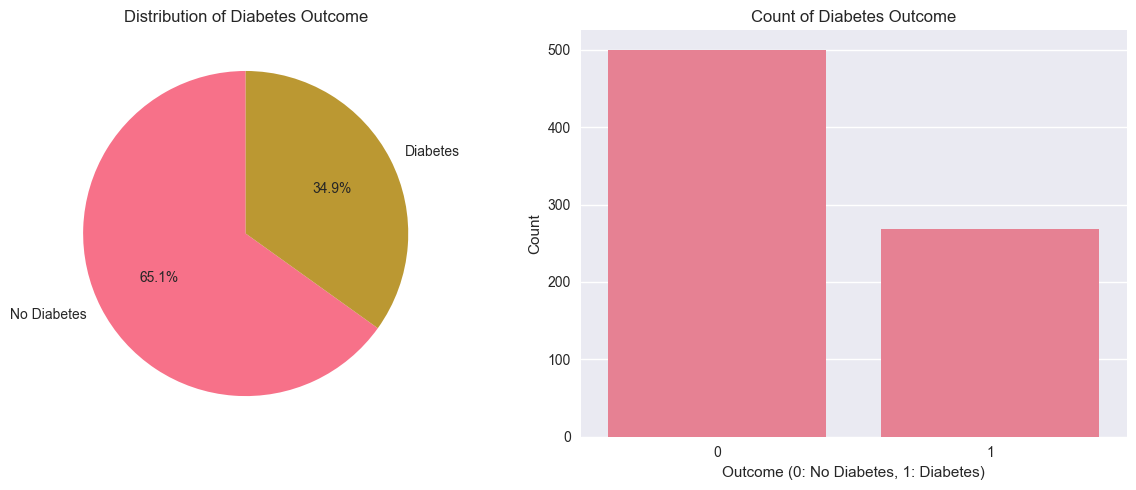

📊 Target Distribution:
No Diabetes (0): 500 (65.1%)
Diabetes (1): 268 (34.9%)


In [8]:
# Target variable distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
outcome_counts = df['Outcome'].value_counts()
plt.pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Outcome')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Outcome')
plt.title('Count of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"📊 Target Distribution:")
print(f"No Diabetes (0): {outcome_counts[0]} ({outcome_counts[0]/len(df)*100:.1f}%)")
print(f"Diabetes (1): {outcome_counts[1]} ({outcome_counts[1]/len(df)*100:.1f}%)")

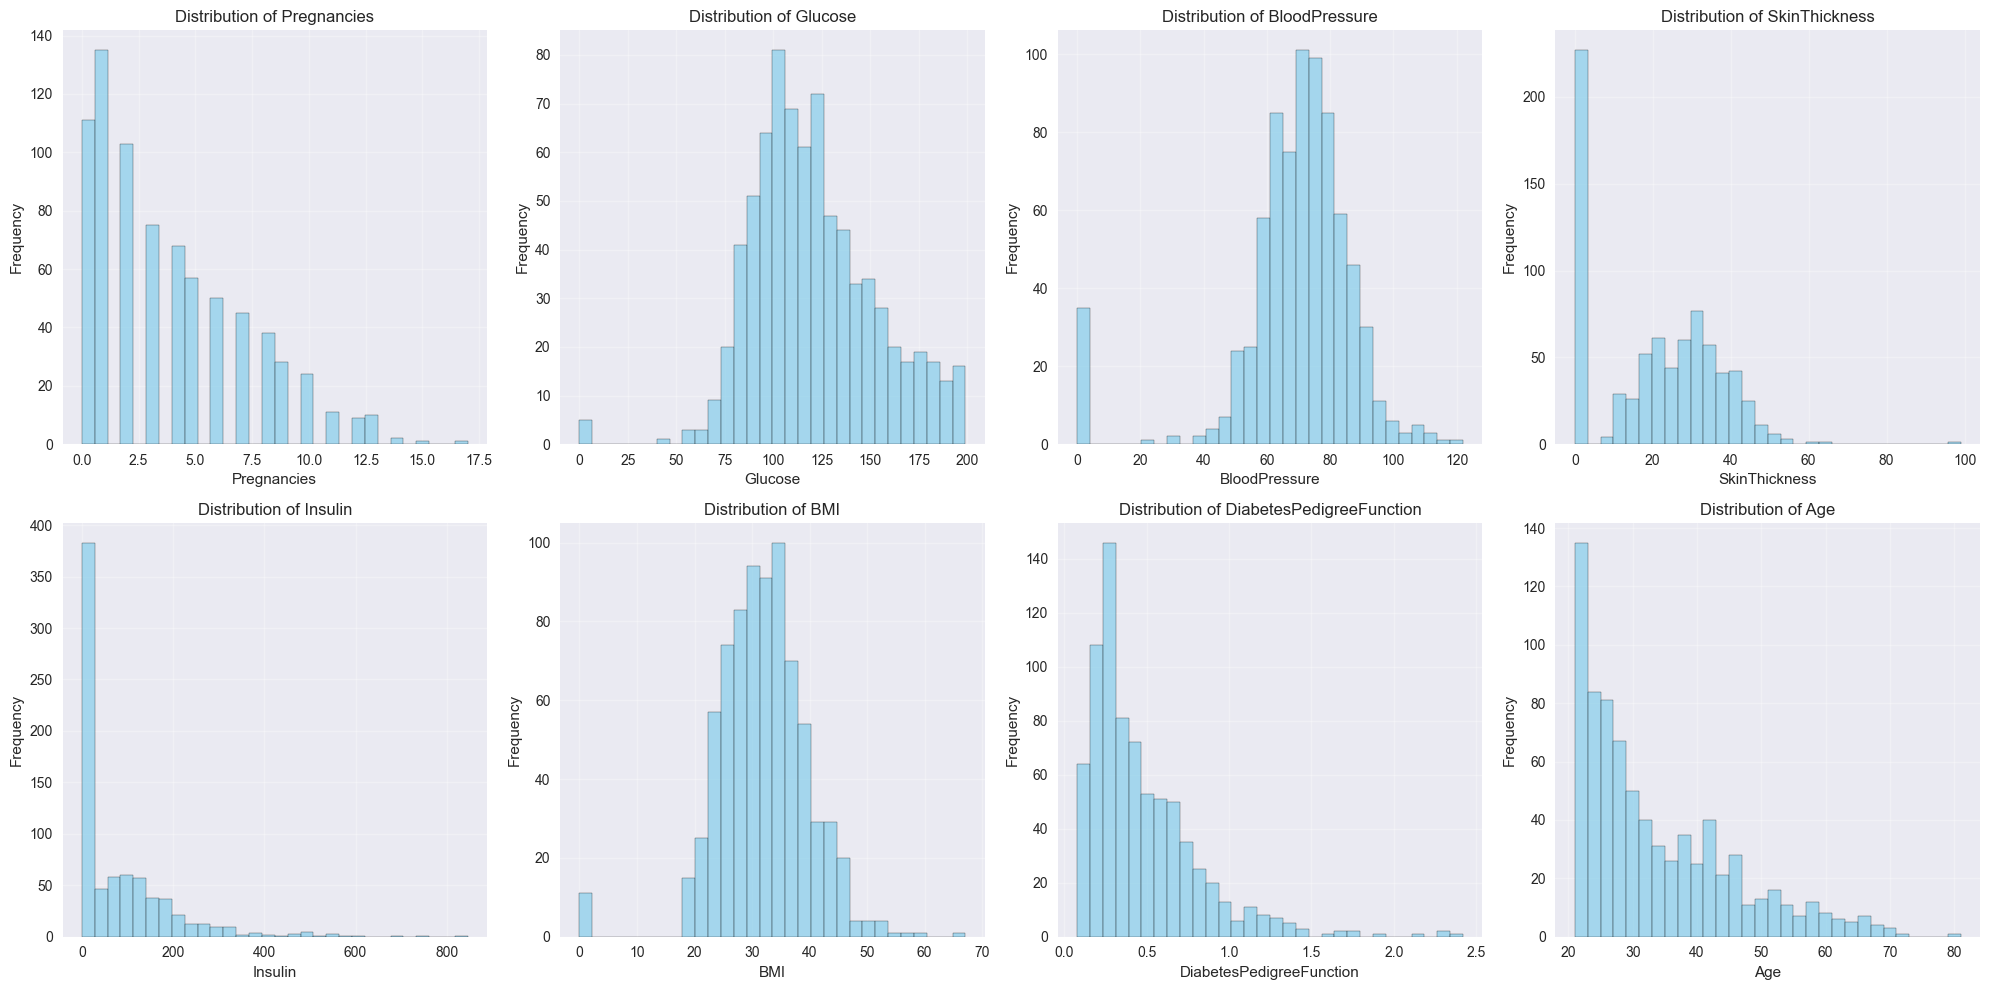

In [9]:
# Feature distributions
features = df.columns[:-1]  # All columns except 'Outcome'
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

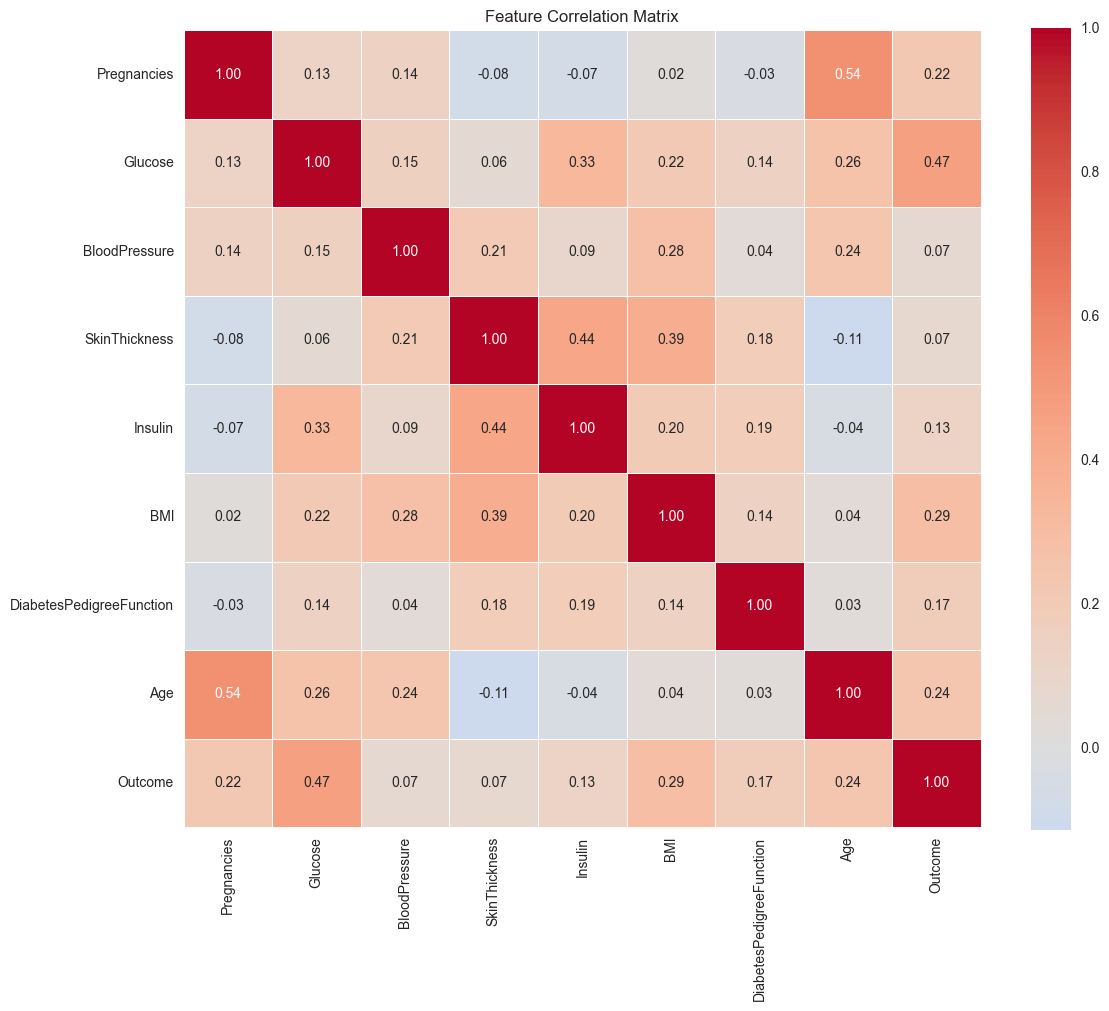

🎯 Features most correlated with Diabetes Outcome:
Glucose: 0.467
BMI: 0.293
Age: 0.238
Pregnancies: 0.222
DiabetesPedigreeFunction: 0.174
Insulin: 0.131
SkinThickness: 0.075
BloodPressure: 0.065


In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find features most correlated with target
target_corr = correlation_matrix['Outcome'].abs().sort_values(ascending=False)[1:]
print("🎯 Features most correlated with Diabetes Outcome:")
for feature, corr in target_corr.items():
    print(f"{feature}: {corr:.3f}")

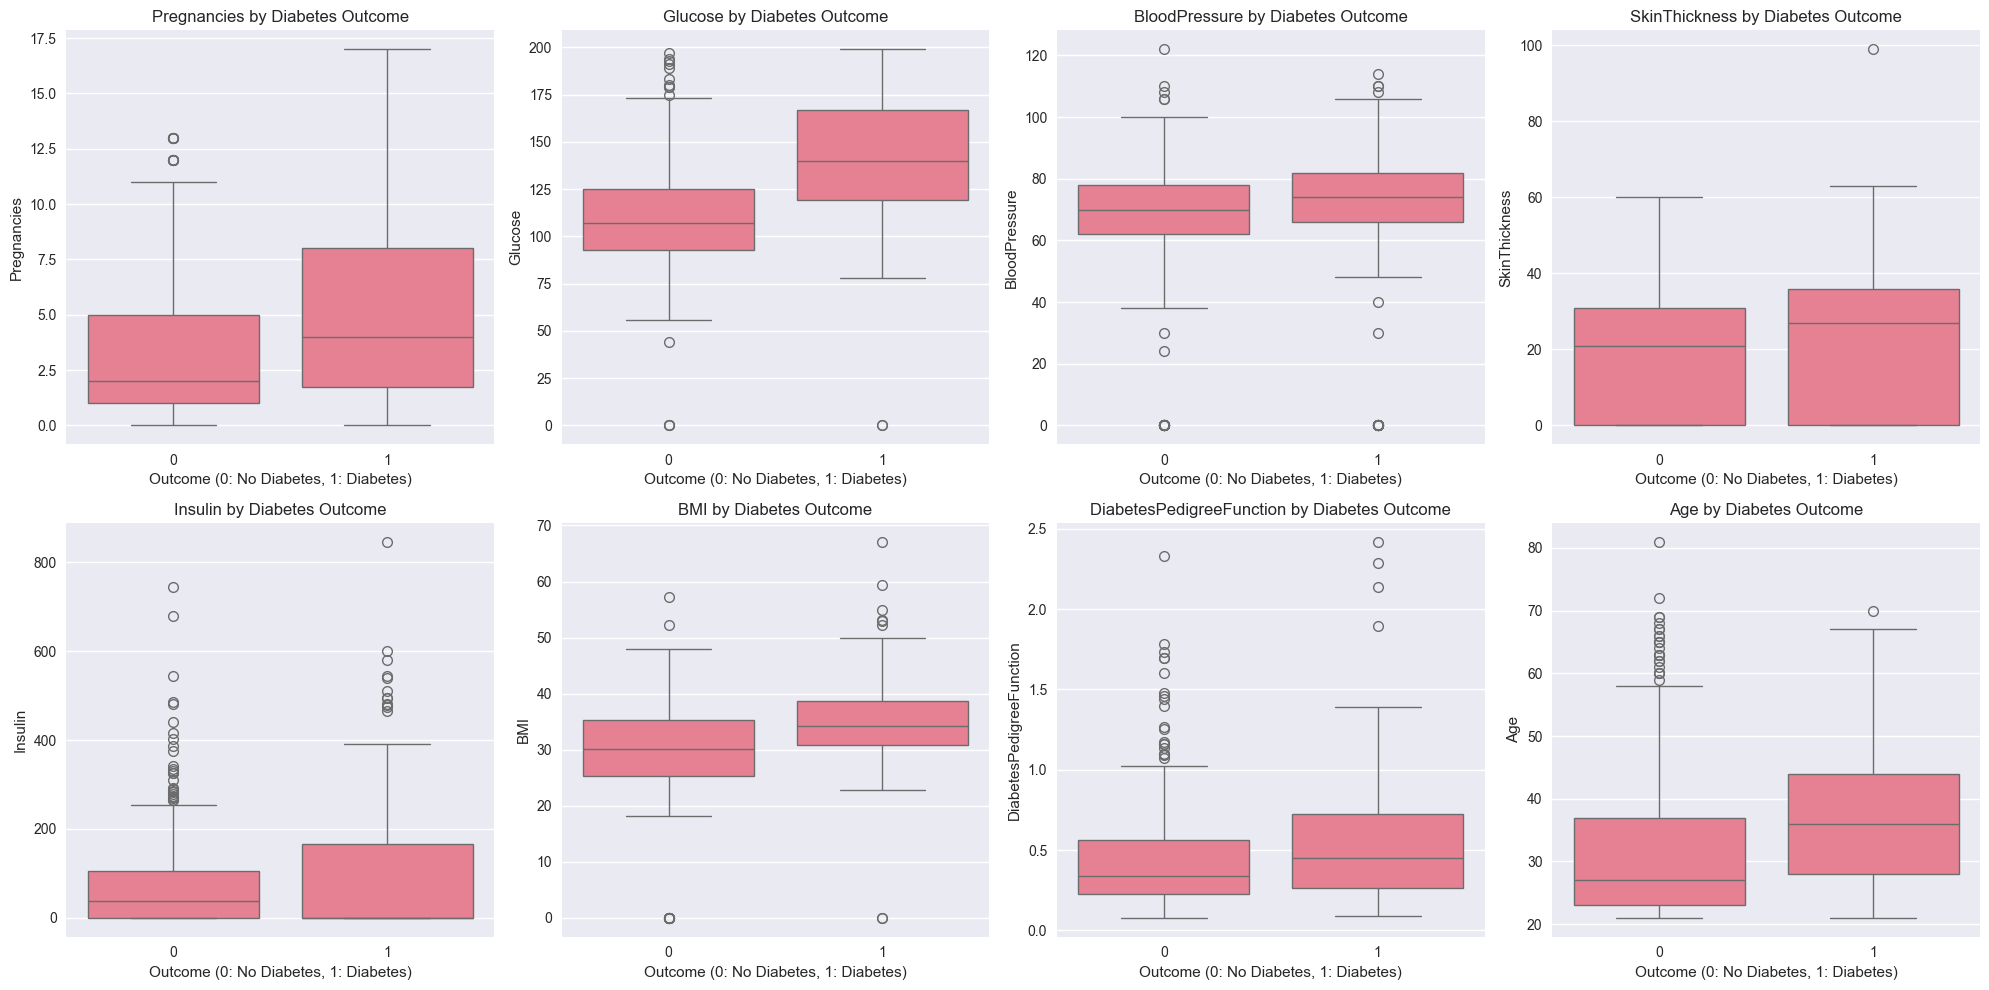

In [11]:
# Box plots to identify outliers and compare distributions by outcome
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.boxplot(data=df, x='Outcome', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Diabetes Outcome')
    axes[i].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')

plt.tight_layout()
plt.show()

In [12]:
# Identify potential data quality issues (impossible zero values)
print("🔍 Data Quality Analysis - Zero Values Check:")
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    print(f"{col}: {zero_count} zeros ({zero_percentage:.1f}%)")

# These zeros are likely missing values that need handling

🔍 Data Quality Analysis - Zero Values Check:
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)


## 4. Data Preprocessing

In [13]:
# Create a copy for preprocessing
df_processed = df.copy()

# Handle zero values in certain columns (replace with median values)
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("🛠️ Handling zero values (replacing with median):")
for col in zero_columns:
    # Calculate median excluding zeros
    median_value = df_processed[df_processed[col] != 0][col].median()
    
    # Replace zeros with median
    zero_count = (df_processed[col] == 0).sum()
    df_processed[col] = df_processed[col].replace(0, median_value)
    
    print(f"{col}: Replaced {zero_count} zeros with median value {median_value:.2f}")

print("✅ Zero values handled successfully!")

🛠️ Handling zero values (replacing with median):
Glucose: Replaced 5 zeros with median value 117.00
BloodPressure: Replaced 35 zeros with median value 72.00
SkinThickness: Replaced 227 zeros with median value 29.00
Insulin: Replaced 374 zeros with median value 125.00
BMI: Replaced 11 zeros with median value 32.30
✅ Zero values handled successfully!


In [14]:
# Feature Engineering - Create new features
print("🔧 Feature Engineering:")

# BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

df_processed['BMI_Category'] = df_processed['BMI'].apply(categorize_bmi)

# Age groups
def categorize_age(age):
    if age < 30:
        return 0  # Young
    elif age < 50:
        return 1  # Middle-aged
    else:
        return 2  # Senior

df_processed['Age_Group'] = df_processed['Age'].apply(categorize_age)

# Glucose levels
def categorize_glucose(glucose):
    if glucose < 100:
        return 0  # Normal
    elif glucose < 126:
        return 1  # Pre-diabetic
    else:
        return 2  # Diabetic range

df_processed['Glucose_Level'] = df_processed['Glucose'].apply(categorize_glucose)

print(f"✅ Created new features: BMI_Category, Age_Group, Glucose_Level")
print(f"Dataset shape after feature engineering: {df_processed.shape}")

🔧 Feature Engineering:
✅ Created new features: BMI_Category, Age_Group, Glucose_Level
Dataset shape after feature engineering: (768, 12)


In [15]:
# Prepare features and target
# Use original features for main analysis
X = df_processed[features]  # Original 8 features
y = df_processed['Outcome']

print(f"📊 Feature Matrix Shape: {X.shape}")
print(f"📊 Target Vector Shape: {y.shape}")
print(f"📊 Feature Names: {list(X.columns)}")

📊 Feature Matrix Shape: (768, 8)
📊 Target Vector Shape: (768,)
📊 Feature Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"🔄 Data Split Complete:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training set diabetes rate: {y_train.mean():.1%}")
print(f"Testing set diabetes rate: {y_test.mean():.1%}")

🔄 Data Split Complete:
Training set: 614 samples
Testing set: 154 samples
Training set diabetes rate: 34.9%
Testing set diabetes rate: 35.1%


In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("⚖️ Feature scaling completed using StandardScaler")
print(f"Training features mean: {X_train_scaled.mean():.6f}")
print(f"Training features std: {X_train_scaled.std():.6f}")

⚖️ Feature scaling completed using StandardScaler
Training features mean: -0.000000
Training features std: 1.000000


## 5. Machine Learning Model Implementation

In [18]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print(f"🧠 Initialized {len(models)} machine learning models:")
for name in models.keys():
    print(f"  • {name}")

🧠 Initialized 6 machine learning models:
  • Logistic Regression
  • Decision Tree
  • Random Forest
  • SVM
  • Naive Bayes
  • K-Nearest Neighbors


In [19]:
# Train models and collect results
results = {}
model_objects = {}

print("🎯 Training and evaluating models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    }
    
    model_objects[name] = model
    
    print(f"  ✅ {name} - Accuracy: {accuracy:.3f}, F1-Score: {f1:.3f}\n")

print("🎉 All models trained successfully!")

🎯 Training and evaluating models...

Training Logistic Regression...
  ✅ Logistic Regression - Accuracy: 0.708, F1-Score: 0.545

Training Decision Tree...
  ✅ Decision Tree - Accuracy: 0.682, F1-Score: 0.515

Training Random Forest...
  ✅ Random Forest - Accuracy: 0.779, F1-Score: 0.653

Training SVM...
  ✅ SVM - Accuracy: 0.740, F1-Score: 0.600

Training Naive Bayes...
  ✅ Naive Bayes - Accuracy: 0.701, F1-Score: 0.596

Training K-Nearest Neighbors...
  ✅ K-Nearest Neighbors - Accuracy: 0.753, F1-Score: 0.635

🎉 All models trained successfully!


## 6. Model Evaluation and Comparison

In [20]:
# Create results comparison DataFrame
results_df = pd.DataFrame({
    model: {
        'Accuracy': results[model]['Accuracy'],
        'Precision': results[model]['Precision'],
        'Recall': results[model]['Recall'],
        'F1-Score': results[model]['F1-Score'],
        'ROC-AUC': results[model]['ROC-AUC']
    }
    for model in results.keys()
}).T

# Sort by F1-Score
results_df = results_df.sort_values('F1-Score', ascending=False)

print("📊 Model Performance Comparison:")
print(results_df.round(4))

📊 Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Random Forest          0.7792     0.7273  0.5926    0.6531   0.8192
K-Nearest Neighbors    0.7532     0.6600  0.6111    0.6346   0.7886
SVM                    0.7403     0.6522  0.5556    0.6000   0.7964
Naive Bayes            0.7013     0.5667  0.6296    0.5965   0.7646
Logistic Regression    0.7078     0.6000  0.5000    0.5455   0.8130
Decision Tree          0.6818     0.5532  0.4815    0.5149   0.6357


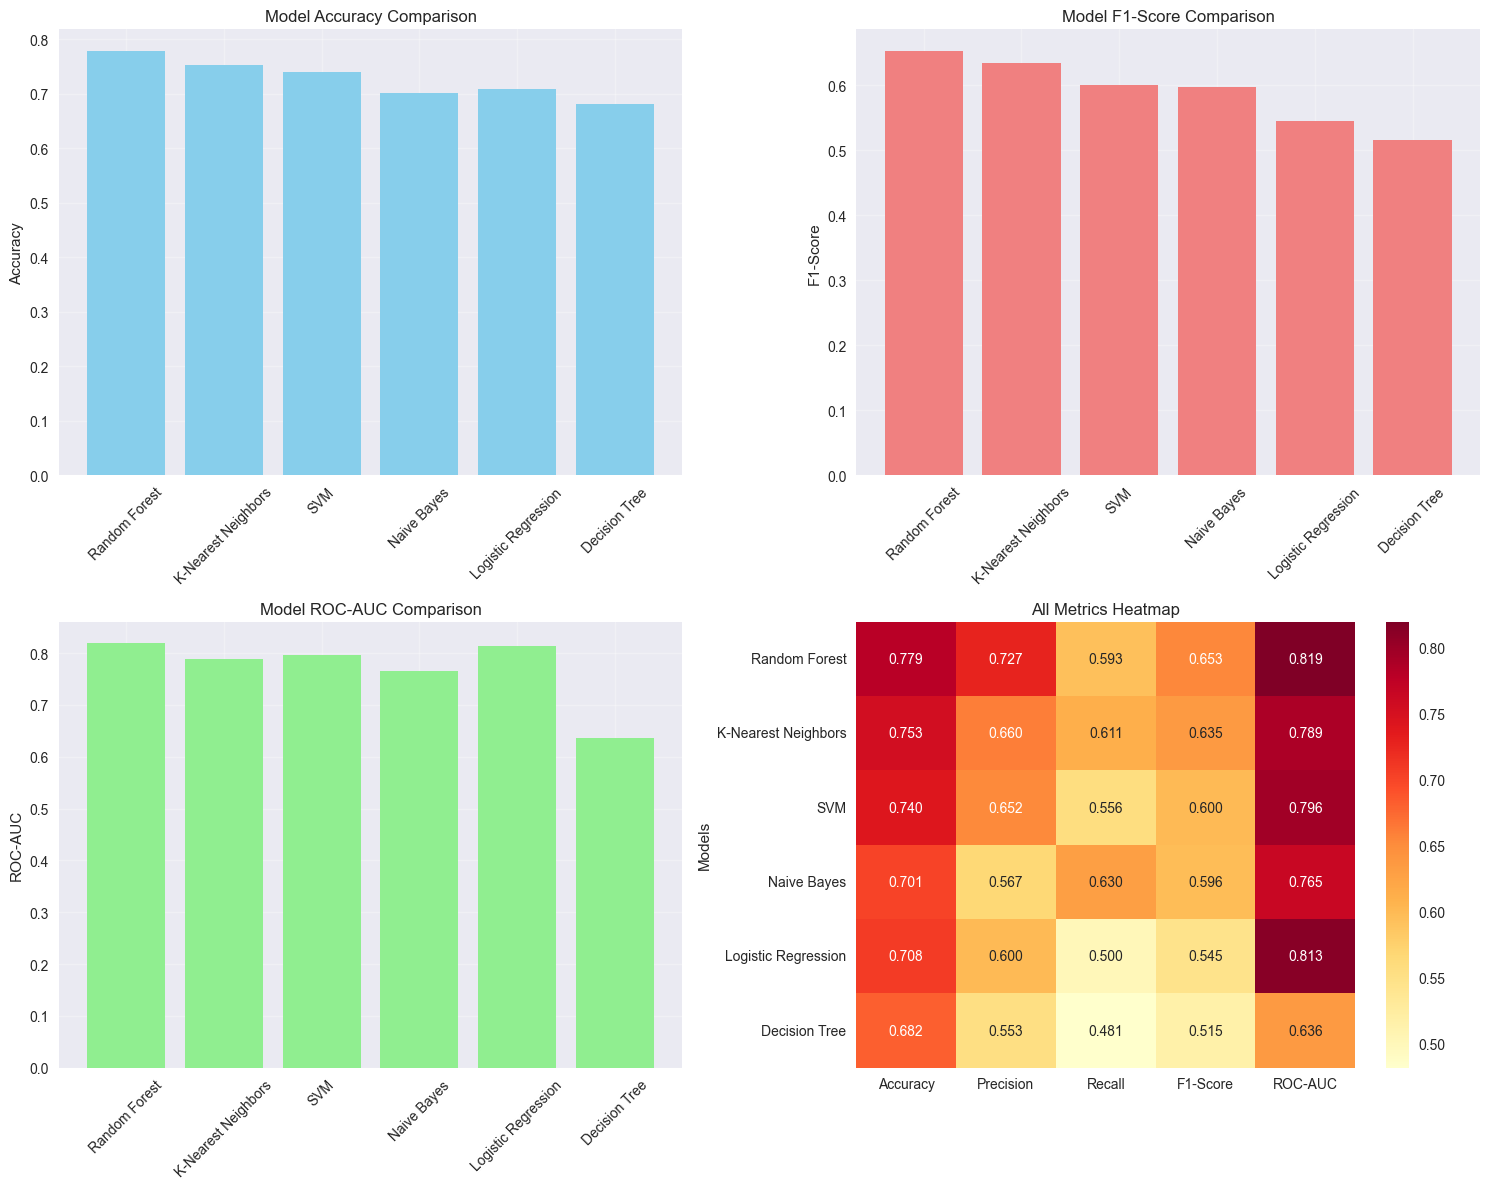

In [21]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(results_df.index, results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# F1-Score comparison
axes[0, 1].bar(results_df.index, results_df['F1-Score'], color='lightcoral')
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# ROC-AUC comparison
axes[1, 0].bar(results_df.index, results_df['ROC-AUC'], color='lightgreen')
axes[1, 0].set_title('Model ROC-AUC Comparison')
axes[1, 0].set_ylabel('ROC-AUC')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# All metrics heatmap
sns.heatmap(results_df, annot=True, cmap='YlOrRd', ax=axes[1, 1], fmt='.3f')
axes[1, 1].set_title('All Metrics Heatmap')
axes[1, 1].set_ylabel('Models')

plt.tight_layout()
plt.show()

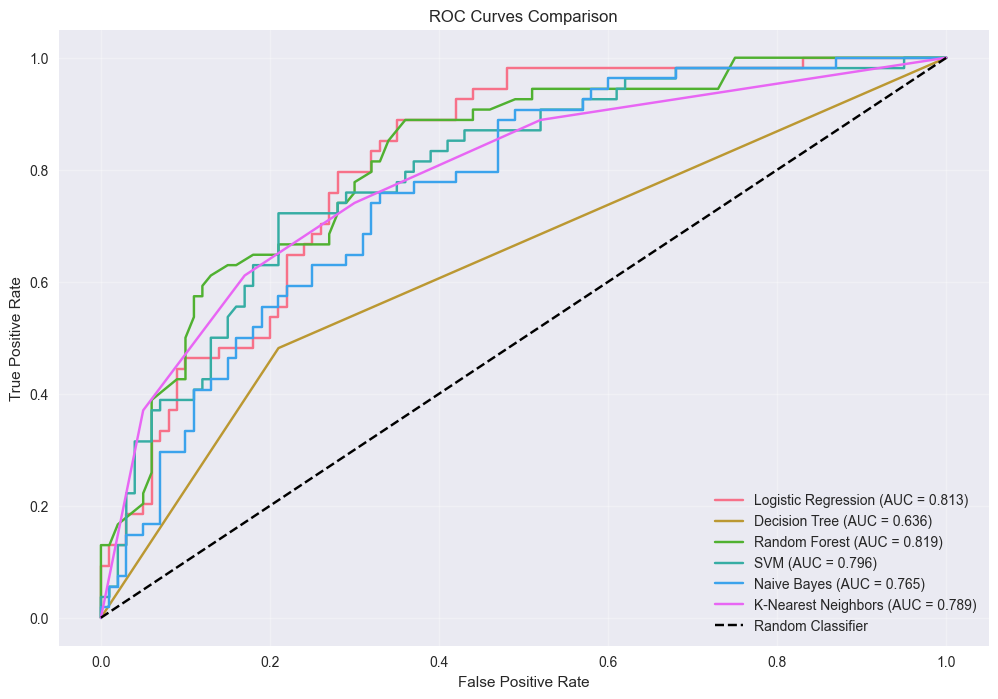

In [22]:
# ROC Curves for all models
plt.figure(figsize=(12, 8))

for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['Probabilities'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['ROC-AUC']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

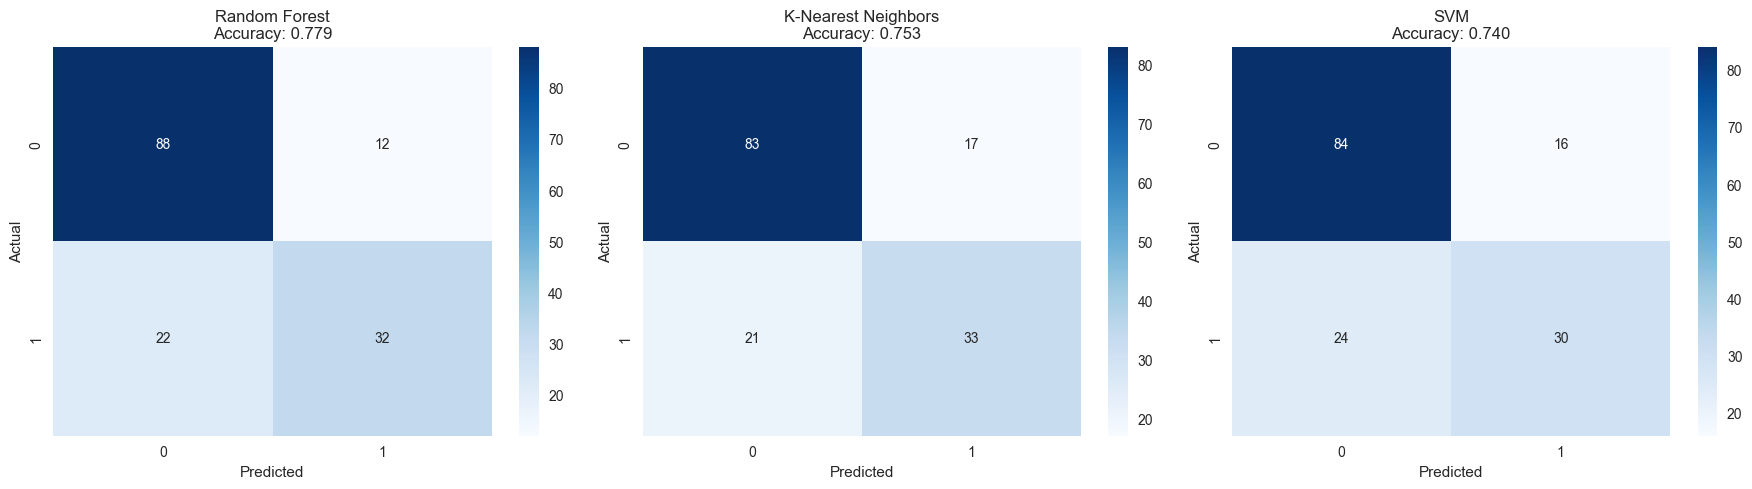

In [23]:
# Confusion matrices for top 3 models
top_models = results_df.head(3).index

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(top_models):
    cm = confusion_matrix(y_test, results[model_name]['Predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name}\nAccuracy: {results[model_name]["Accuracy"]:.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [24]:
# Detailed classification reports for top 3 models
print("📋 Detailed Classification Reports for Top 3 Models:\n")

for model_name in top_models:
    print(f"🎯 {model_name}:")
    print("=" * 50)
    print(classification_report(y_test, results[model_name]['Predictions'], 
                              target_names=['No Diabetes', 'Diabetes']))
    print("\n")

📋 Detailed Classification Reports for Top 3 Models:

🎯 Random Forest:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.88      0.84       100
    Diabetes       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



🎯 K-Nearest Neighbors:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.83      0.81       100
    Diabetes       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



🎯 SVM:
              precision    recall  f1-score   support

 No Diabetes       0.78      0.84      0.81       100
    Diabetes       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71 

## 7. Hyperparameter Tuning with GridSearchCV

In [25]:
# Get the best performing model for hyperparameter tuning
best_model_name = results_df.index[0]
print(f"🎯 Performing hyperparameter tuning on: {best_model_name}")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, 15, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy']
    }
}

# Perform GridSearchCV on the best model
if best_model_name in param_grids:
    print(f"🔍 Grid search parameters for {best_model_name}:")
    for param, values in param_grids[best_model_name].items():
        print(f"  {param}: {values}")
    
    # Initialize the base model
    base_model = models[best_model_name]
    
    # Setup GridSearchCV
    grid_search = GridSearchCV(
        base_model,
        param_grids[best_model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\n🚀 Starting GridSearchCV for {best_model_name}...")
    
    # Use appropriate data (scaled or not)
    if best_model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        grid_search.fit(X_train_scaled, y_train)
    else:
        grid_search.fit(X_train, y_train)
    
    print("✅ GridSearchCV completed!")
else:
    print(f"⚠️ No parameter grid defined for {best_model_name}")

🎯 Performing hyperparameter tuning on: Random Forest
🔍 Grid search parameters for Random Forest:
  n_estimators: [50, 100, 200]
  max_depth: [3, 5, 10, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

🚀 Starting GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ GridSearchCV completed!


In [26]:
# Display GridSearch results
if best_model_name in param_grids:
    print(f"🏆 Best Parameters for {best_model_name}:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    
    print(f"\n📊 Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")
    
    # Evaluate the best model on test set
    best_model_tuned = grid_search.best_estimator_
    
    if best_model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        y_pred_tuned = best_model_tuned.predict(X_test_scaled)
        y_pred_proba_tuned = best_model_tuned.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_tuned = best_model_tuned.predict(X_test)
        y_pred_proba_tuned = best_model_tuned.predict_proba(X_test)[:, 1]
    
    # Calculate tuned model metrics
    tuned_metrics = {
        'Accuracy': accuracy_score(y_test, y_pred_tuned),
        'Precision': precision_score(y_test, y_pred_tuned),
        'Recall': recall_score(y_test, y_pred_tuned),
        'F1-Score': f1_score(y_test, y_pred_tuned),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba_tuned)
    }
    
    print(f"\n📈 Tuned Model Performance on Test Set:")
    for metric, value in tuned_metrics.items():
        original_value = results[best_model_name][metric]
        improvement = value - original_value
        print(f"  {metric}: {value:.4f} (Original: {original_value:.4f}, Δ: {improvement:+.4f})")
    
    # Update the best model in our results
    results[f"{best_model_name} (Tuned)"] = {
        'Accuracy': tuned_metrics['Accuracy'],
        'Precision': tuned_metrics['Precision'],
        'Recall': tuned_metrics['Recall'],
        'F1-Score': tuned_metrics['F1-Score'],
        'ROC-AUC': tuned_metrics['ROC-AUC'],
        'Predictions': y_pred_tuned,
        'Probabilities': y_pred_proba_tuned
    }
    
    # Store the tuned model
    model_objects[f"{best_model_name} (Tuned)"] = best_model_tuned

🏆 Best Parameters for Random Forest:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 50

📊 Best Cross-Validation F1-Score: 0.6477

📈 Tuned Model Performance on Test Set:
  Accuracy: 0.7273 (Original: 0.7792, Δ: -0.0519)
  Precision: 0.6304 (Original: 0.7273, Δ: -0.0968)
  Recall: 0.5370 (Original: 0.5926, Δ: -0.0556)
  F1-Score: 0.5800 (Original: 0.6531, Δ: -0.0731)
  ROC-AUC: 0.7906 (Original: 0.8192, Δ: -0.0285)


## 8. K-Fold Cross Validation

In [27]:
# Perform K-Fold Cross Validation on top models
print("🔄 Performing 10-Fold Cross Validation on top models...\n")

cv_results = {}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Test top 3 models and the tuned model
models_to_cv = list(top_models) + ([f"{best_model_name} (Tuned)"] if best_model_name in param_grids else [])

for model_name in models_to_cv:
    if model_name.endswith('(Tuned)'):
        model = model_objects[model_name]
    else:
        model = model_objects[model_name]
    
    # Use appropriate data for each model
    if any(name in model_name for name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']):
        X_cv = X_train_scaled
    else:
        X_cv = X_train
    
    # Perform cross-validation for multiple metrics
    cv_accuracy = cross_val_score(model, X_cv, y_train, cv=skf, scoring='accuracy')
    cv_precision = cross_val_score(model, X_cv, y_train, cv=skf, scoring='precision')
    cv_recall = cross_val_score(model, X_cv, y_train, cv=skf, scoring='recall')
    cv_f1 = cross_val_score(model, X_cv, y_train, cv=skf, scoring='f1')
    cv_roc_auc = cross_val_score(model, X_cv, y_train, cv=skf, scoring='roc_auc')
    
    cv_results[model_name] = {
        'Accuracy': {'mean': cv_accuracy.mean(), 'std': cv_accuracy.std()},
        'Precision': {'mean': cv_precision.mean(), 'std': cv_precision.std()},
        'Recall': {'mean': cv_recall.mean(), 'std': cv_recall.std()},
        'F1-Score': {'mean': cv_f1.mean(), 'std': cv_f1.std()},
        'ROC-AUC': {'mean': cv_roc_auc.mean(), 'std': cv_roc_auc.std()}
    }
    
    print(f"📊 {model_name}:")
    print(f"  Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
    print(f"  F1-Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
    print(f"  ROC-AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})\n")

print("✅ Cross-validation completed!")

🔄 Performing 10-Fold Cross Validation on top models...

📊 Random Forest:
  Accuracy: 0.7687 (±0.0543)
  F1-Score: 0.6378 (±0.0896)
  ROC-AUC: 0.8166 (±0.0529)

📊 K-Nearest Neighbors:
  Accuracy: 0.7361 (±0.0752)
  F1-Score: 0.6107 (±0.0991)
  ROC-AUC: 0.7941 (±0.0755)

📊 SVM:
  Accuracy: 0.7770 (±0.0421)
  F1-Score: 0.6456 (±0.0651)
  ROC-AUC: 0.8336 (±0.0465)

📊 Random Forest (Tuned):
  Accuracy: 0.7623 (±0.0460)
  F1-Score: 0.6382 (±0.0762)
  ROC-AUC: 0.8141 (±0.0492)

✅ Cross-validation completed!


## 9. Model Saving for Deployment

In [28]:
# Identify the final best model
if best_model_name in param_grids:
    final_best_model_name = f"{best_model_name} (Tuned)"
    final_best_model = model_objects[final_best_model_name]
else:
    final_best_model_name = best_model_name
    final_best_model = model_objects[best_model_name]

print(f"🏆 Final best model: {final_best_model_name}")
print(f"📊 Test F1-Score: {results[final_best_model_name]['F1-Score']:.4f}")
print(f"📊 Test Accuracy: {results[final_best_model_name]['Accuracy']:.4f}")

# Save the model and scaler
print("\n💾 Saving model and preprocessing objects...")

# Save using joblib (recommended for scikit-learn models)
joblib.dump(final_best_model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Also save using pickle as backup
with open('best_diabetes_model_pickle.pkl', 'wb') as f:
    pickle.dump(final_best_model, f)

with open('feature_scaler_pickle.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names for the Streamlit app
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("✅ Model and preprocessing objects saved successfully!")
print("📁 Files created:")
print("  • best_diabetes_model.pkl (joblib)")
print("  • best_diabetes_model_pickle.pkl (pickle)")
print("  • feature_scaler.pkl (joblib)")
print("  • feature_scaler_pickle.pkl (pickle)")
print("  • feature_names.pkl")

🏆 Final best model: Random Forest (Tuned)
📊 Test F1-Score: 0.5800
📊 Test Accuracy: 0.7273

💾 Saving model and preprocessing objects...
✅ Model and preprocessing objects saved successfully!
📁 Files created:
  • best_diabetes_model.pkl (joblib)
  • best_diabetes_model_pickle.pkl (pickle)
  • feature_scaler.pkl (joblib)
  • feature_scaler_pickle.pkl (pickle)
  • feature_names.pkl


## 10. Feature Importance Analysis

🌳 Feature Importance from Random Forest (Tuned):
                    Feature  Importance
1                   Glucose    0.275906
5                       BMI    0.170211
7                       Age    0.123393
6  DiabetesPedigreeFunction    0.112244
4                   Insulin    0.098371
0               Pregnancies    0.083019
3             SkinThickness    0.068674
2             BloodPressure    0.068181


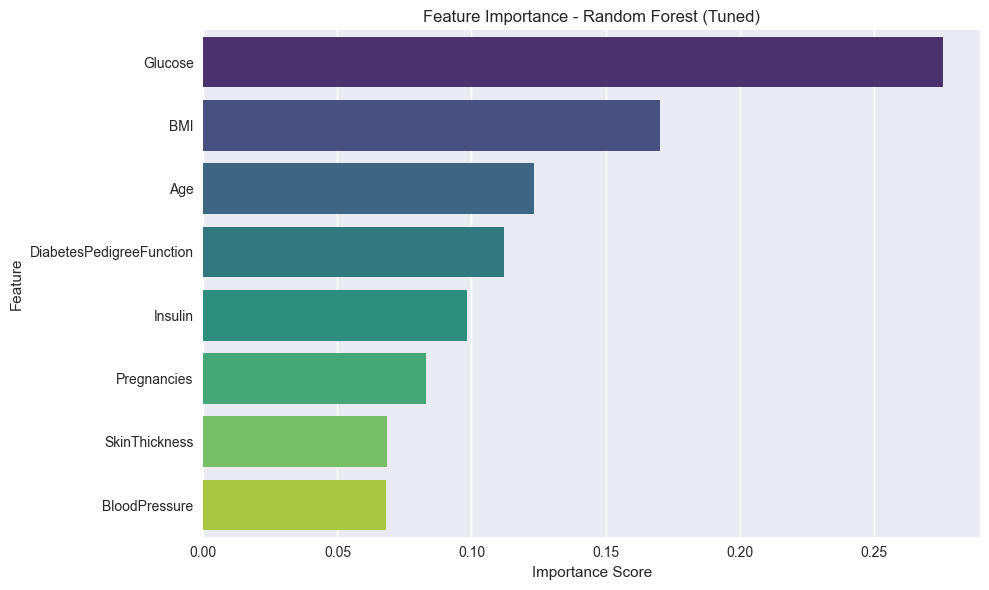

In [29]:
# Feature importance analysis (for tree-based models)
if 'Tree' in final_best_model_name or 'Forest' in final_best_model_name:
    feature_importance = final_best_model.feature_importances_
    feature_names = X.columns
    
    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    print(f"🌳 Feature Importance from {final_best_model_name}:")
    print(importance_df)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
    plt.title(f'Feature Importance - {final_best_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
elif 'Logistic' in final_best_model_name:
    # For logistic regression, show coefficients
    coefficients = final_best_model.coef_[0]
    feature_names = X.columns
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print(f"📈 Feature Coefficients from {final_best_model_name}:")
    print(coef_df[['Feature', 'Coefficient']])
    
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'blue' for x in coef_df['Coefficient']]
    sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette=colors)
    plt.title(f'Feature Coefficients - {final_best_model_name}')
    plt.xlabel('Coefficient Value')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## 11. Final Model Summary

In [30]:
# Create final summary
print("🎯 DIABETES PREDICTION MODEL - FINAL SUMMARY")
print("=" * 60)
print(f"Dataset: Pima Indians Diabetes Dataset")
print(f"Total Samples: {len(df)}")
print(f"Features: {len(X.columns)}")
print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")
print(f"\nClass Distribution:")
print(f"  No Diabetes: {(y == 0).sum()} ({(y == 0).mean():.1%})")
print(f"  Diabetes: {(y == 1).sum()} ({(y == 1).mean():.1%})")

print(f"\n🏆 BEST MODEL: {final_best_model_name}")
print("-" * 40)
final_metrics = results[final_best_model_name]
print(f"Accuracy:  {final_metrics['Accuracy']:.4f}")
print(f"Precision: {final_metrics['Precision']:.4f}")
print(f"Recall:    {final_metrics['Recall']:.4f}")
print(f"F1-Score:  {final_metrics['F1-Score']:.4f}")
print(f"ROC-AUC:   {final_metrics['ROC-AUC']:.4f}")

if final_best_model_name in cv_results:
    cv_f1 = cv_results[final_best_model_name]['F1-Score']
    print(f"\nCross-Validation F1-Score: {cv_f1['mean']:.4f} (±{cv_f1['std']:.4f})")

print(f"\n📁 Model saved as: best_diabetes_model.pkl")
print(f"📁 Scaler saved as: feature_scaler.pkl")
print(f"📁 Features saved as: feature_names.pkl")

print("\n✅ Model ready for deployment in Streamlit app!")
print("✅ Analysis complete - proceed to create app.py")

🎯 DIABETES PREDICTION MODEL - FINAL SUMMARY
Dataset: Pima Indians Diabetes Dataset
Total Samples: 768
Features: 8
Training Samples: 614
Testing Samples: 154

Class Distribution:
  No Diabetes: 500 (65.1%)
  Diabetes: 268 (34.9%)

🏆 BEST MODEL: Random Forest (Tuned)
----------------------------------------
Accuracy:  0.7273
Precision: 0.6304
Recall:    0.5370
F1-Score:  0.5800
ROC-AUC:   0.7906

Cross-Validation F1-Score: 0.6382 (±0.0762)

📁 Model saved as: best_diabetes_model.pkl
📁 Scaler saved as: feature_scaler.pkl
📁 Features saved as: feature_names.pkl

✅ Model ready for deployment in Streamlit app!
✅ Analysis complete - proceed to create app.py
